## GitHub Link

## My Capstone Project - Assignment 9

* Car Price Prediction
* Uses Kaggle Dataset

In [ ]:
%cd /content/drive/MyDrive/My_ST1CapstoneProject

/content/drive/MyDrive/My_ST1CapstoneProject


In [ ]:
!ls /content/drive/MyDrive/My_ST1CapstoneProject

car_price_prediction.csv  DataforML.pkl  DataForML.pkl	Final_XGB_Model.pkl


##This project goes over a dataset known as the Car Price Prediction Challenge from Kaggle (https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge?resource=download)

* Using various car brands, this project aims to predict the prices for the given 19237 different IDs.
* My project is to make a complete Data Analysis and Prediction study.
* To complete this project, I will be using resources given through lectures, tutorials and various python packages.

## Step 1: Reading the Dataset
We first must gain an understanding of what we are predicting.

In [ ]:
# Suppressing any warnings messages
import warnings
warnings.filterwarnings('ignore')

Shape before deleting duplicate values: (19237, 28)
Shape after deleting duplicate values: (18924, 28)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Manufacturer_encoding,Model_encoding,Fuel type_encoding,Gear box type_encoding,Drive wheels_encoding,Color_encoding,Category_encoding,Wheel_encoding,Doors_encoding,True_Price
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,...,33,1242,2,0,0,12,4,0,1,9.497622
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,...,9,658,5,2,0,1,4,0,1,9.718422
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,...,22,684,5,3,1,1,3,1,1,9.043932
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,...,17,661,2,0,0,14,4,0,1,8.190632
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,...,22,684,5,0,1,12,3,0,1,9.369564
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,...,24,1305,1,0,1,14,4,0,1,10.583879
6,45656768,1803,761.0,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,...,59,1154,2,0,1,14,3,0,1,7.497207
7,45816158,549,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,...,24,1334,5,0,1,7,9,0,1,6.308098
8,45641395,1098,394.0,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,...,59,435,2,0,1,1,9,0,1,7.001246
9,45756839,26657,NaN,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,...,33,1235,5,0,0,12,4,0,1,10.190807


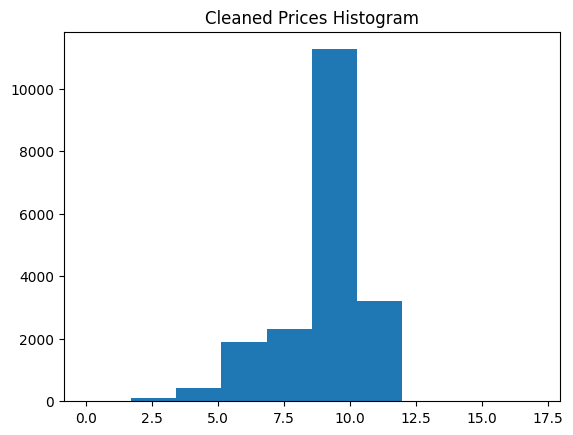

In [ ]:
# Reading the dataset (Importing various tools that will allows us to read the given excel)
import pandas as pd
# Pandas is a library in python which helps read, explore, change and analyse datasets
import numpy as np
# Numpy is a library in python which helps speed up the rate of which we can read arrays and provides many different formulae to read these arrays (Stands for Numerical Python)
import matplotlib.pyplot as plt

# Adding a new line to the library
carPrediction=pd.read_csv('/content/drive/MyDrive/My_ST1CapstoneProject/car_price_prediction.csv', encoding = 'latin')

carPrediction['Levy'] = carPrediction['Levy'].replace('-', np.nan).astype(float)
carPrediction['Engine volume'] = carPrediction['Engine volume'].str.replace(' Turbo', '').astype(float)
carPrediction['Mileage'] = carPrediction['Mileage'].str.replace(' km', '').astype(float)
carPrediction['Manufacturer'] = carPrediction['Manufacturer'].str.replace('á\x83¡á\x83®á\x83\x95á\x83\x90', '').astype(str)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
carPrediction['Manufacturer_encoding'] = le.fit_transform(carPrediction['Manufacturer'])

le = LabelEncoder()
carPrediction['Model_encoding'] = le.fit_transform(carPrediction['Model'])

le = LabelEncoder()
carPrediction['Fuel type_encoding'] = le.fit_transform(carPrediction['Fuel type'])

le = LabelEncoder()
carPrediction['Gear box type_encoding'] = le.fit_transform(carPrediction['Gear box type'])

le = LabelEncoder()
carPrediction['Drive wheels_encoding'] = le.fit_transform(carPrediction['Drive wheels'])

le = LabelEncoder()
carPrediction['Color_encoding'] = le.fit_transform(carPrediction['Color'])

le = LabelEncoder()
carPrediction['Category_encoding'] = le.fit_transform(carPrediction['Category'])

le = LabelEncoder()
carPrediction['Wheel_encoding'] = le.fit_transform(carPrediction['Wheel'])

le = LabelEncoder()
carPrediction['Doors_encoding'] = le.fit_transform(carPrediction['Doors'])


%matplotlib inline
# Going to replace zero prices with NaN and then drop rows with NaN prices
carPrediction['Price']=carPrediction['Price'].replace(0, np.NaN)
carPrediction.dropna(subset=['Price'], inplace=True) # Will correct the dataframe

# Calculate prices now there are no zero values
carPrediction['True_Price'] = np.log(carPrediction['Price'])

# Histogram of the now cleaned prices
plt.hist(carPrediction['True_Price'])
plt.title("Cleaned Prices Histogram")


print('Shape before deleting duplicate values:', carPrediction.shape)

# Removing duplicates if any
carPrediction=carPrediction.drop_duplicates()
print('Shape after deleting duplicate values:', carPrediction.shape)

# Printing sample data
# The start of our observation for different variables
carPrediction.head(10)

## Key Observations for Step 1:

* Started of with 19237 different vehicles and went down to 18924
* There are 18 different attributes and they are outlined below
* ID - the uniqueness of each vehicle
* Price - how much the car costs
* Levy - the tax price for the import and export
* Manufacturer - Car brand
* Model - Variation/type of car
* Prod Year - Year of production
* Category - Car class type
* Leather Interior - Is the inside leather
* Fuel type - What type of fuel to use
* Engine Volume - Engine Measurement
* Mileage - Distance already travelled
* Cylinders - How many cylinders
* Gear Box Type - Different types of gear boxes
* Drive Wheels - Refers to a four wheel drive or front wheel drive
* Doors - Meant to be amount of doors, isn't fully numerical even though it's suppose to be, May 2nd refers to 1 - 2 doors, May 4th is 3 - 4 doors and >5 is 5 or greater doors
* Wheel - Refers to dominate hand for wheel
* Color - Car color
* Airbags - Amounf of airbags within the car

## Step 2: Problem Statement Definition

* We will create a prediction model to predict True Price of a car
* We will predict the Price using all variables excluding Price as that is what we are aiming to predict

## Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis

* Based on the problem statement, we need to create a supervised ML Regression model as the target variable is **Continuous**.

## Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed)

* If the target variable's distribution is poor then the predictive modelling will produce poor results
* Ideally a Bell Curve result is ideal but a slightly positive or negative skew is acceptable
* When performing Regression Algorithm modelling and analysis, the Histogram must look like a Bell Curve or slightly skewed variant
* If not, then it will impact the Machine Learning algorithms ability to learn all the scenarios from the data

<Axes: >

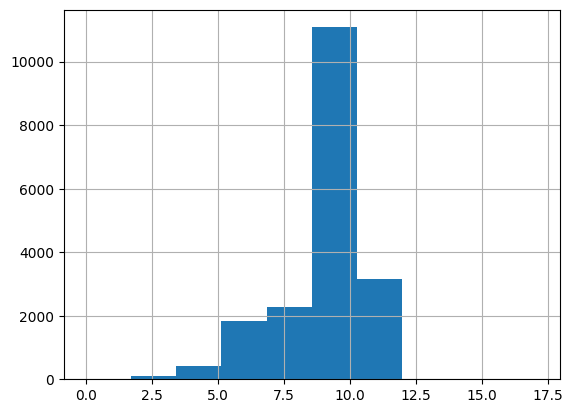

In [ ]:
# Creating a histogram as th Target Variable is Continuous
# Will help us understand the distribution of the Price Values
carPrediction['True_Price'].hist()

## Observations from Step 4

* Need help, have tried various different variables but none bell curve

## Step 5: Basic Level of Data Exploration

* This step is performed to guage the overall data
* The volume of data and the types of columns present in the data
* Initial assessment of the data should be done to idenitgu which columns are Quantitive, Categorical or Qualitative
* This step is helps to start the column/data rejection process
* You must look at each colun carefullt and ask, does this column affect the Target variable/Class?
* An example in this dataset is looking at a column and questioning if this influences the price of a car
* If the answer is a clear no then you remove said column
* There are four commands which are used for Basic Data exploratory Analysis in Python
* head(): This helps to see a few sample rows of data (As shown in Step 1)
* info(): This provides the summarised information of the data
* describe(): This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous

In [ ]:
# Looking at sample rows of data once again
carPrediction.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Manufacturer_encoding,Model_encoding,Fuel type_encoding,Gear box type_encoding,Drive wheels_encoding,Color_encoding,Category_encoding,Wheel_encoding,Doors_encoding,True_Price
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,...,33,1242,2,0,0,12,4,0,1,9.497622
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,...,9,658,5,2,0,1,4,0,1,9.718422
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,...,22,684,5,3,1,1,3,1,1,9.043932
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,...,17,661,2,0,0,14,4,0,1,8.190632
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,...,22,684,5,0,1,12,3,0,1,9.369564


In [ ]:
# Now we observe a summatised version of the data information
# Data types, missing values based on number of non-null values vs total rows etc
# Remove those variables from data which have too many missing values
# Remove Qualitative varibales which cannot be used in Machine Learning
carPrediction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18924 non-null  int64  
 1   Price                   18924 non-null  int64  
 2   Levy                    13215 non-null  float64
 3   Manufacturer            18924 non-null  object 
 4   Model                   18924 non-null  object 
 5   Prod. year              18924 non-null  int64  
 6   Category                18924 non-null  object 
 7   Leather interior        18924 non-null  object 
 8   Fuel type               18924 non-null  object 
 9   Engine volume           18924 non-null  float64
 10  Mileage                 18924 non-null  float64
 11  Cylinders               18924 non-null  float64
 12  Gear box type           18924 non-null  object 
 13  Drive wheels            18924 non-null  object 
 14  Doors                   18924 non-null  obj

In [ ]:
# Looking at the descriptive statistics of the data
carPrediction.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Manufacturer_encoding,Model_encoding,Fuel type_encoding,Gear box type_encoding,Drive wheels_encoding,Color_encoding,Category_encoding,Wheel_encoding,Doors_encoding,True_Price
count,1.892400e+04,1.892400e+04,13215.000000,18924,18924,18924.000000,18924,18924,18924,18924.000000,...,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000
unique,NaN,NaN,NaN,65,1590,NaN,11,2,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,3729,1069,NaN,8600,13731,9944,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.557538e+07,1.858744e+04,906.299205,NaN,NaN,2010.914236,NaN,NaN,NaN,2.306251,...,34.080480,862.224530,3.426971,0.537571,0.909691,7.772194,6.266804,0.076781,0.965969,9.027795
std,9.375468e+05,1.921356e+05,463.296871,NaN,NaN,5.665749,NaN,NaN,NaN,0.877591,...,17.787968,410.990871,1.806295,0.897196,0.566586,5.361955,2.791944,0.266250,0.214430,1.588994
min,2.074688e+07,1.000000e+00,87.000000,NaN,NaN,1939.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.569501e+07,5.331000e+03,640.000000,NaN,NaN,2009.000000,NaN,NaN,NaN,1.800000,...,22.000000,537.000000,2.000000,0.000000,1.000000,1.000000,4.000000,0.000000,1.000000,8.581294
50%,4.577191e+07,1.317200e+04,781.000000,NaN,NaN,2012.000000,NaN,NaN,NaN,2.000000,...,33.000000,834.000000,5.000000,0.000000,1.000000,7.000000,7.000000,0.000000,1.000000,9.485849
75%,4.580174e+07,2.206300e+04,1058.000000,NaN,NaN,2015.000000,NaN,NaN,NaN,2.500000,...,55.000000,1226.000000,5.000000,1.000000,1.000000,12.000000,9.000000,0.000000,1.000000,10.001657


In [ ]:
# Finding the unique values for each column
# To understand which column is categorical and which is Continuous
# Typically if the number of unique values are < 20 then the varible is likley to be a category otherwise Continuous
carPrediction.nunique()

ID                        18924
Price                      2315
Levy                        558
Manufacturer                 65
Model                      1590
Prod. year                   54
Category                     11
Leather interior              2
Fuel type                     7
Engine volume                65
Mileage                    7687
Cylinders                    13
Gear box type                 4
Drive wheels                  3
Doors                         3
Wheel                         2
Color                        16
Airbags                      17
Manufacturer_encoding        65
Model_encoding             1590
Fuel type_encoding            7
Gear box type_encoding        4
Drive wheels_encoding         3
Color_encoding               16
Category_encoding            11
Wheel_encoding                2
Doors_encoding                3
True_Price                 2315
dtype: int64

## Observations from Step 5 - Basic Exploratory Data Analysis

* Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regarding each column
* Hence, creating an initial roadmap for further analysis
* The selected columns in this step are not final, further study will be done and then a final list will be created
* ID - Continuous. Selected
* Price - Continuous. Selected. This is the target variable which needs to be predicted
* Levy - Continuous. Selected
* Manufacturer - Continuous. Selected
* Model - Continuous. Selected
* Prod. Year - Continuous. Selected
* Category - Categorical. Selected
* Leather Interior - Binary. Selected
* Fuel Type - Categorical. Selected
* Engine Volume - Continuous. Selected
* Mileage - Continuous. Selected
* Cylinders - Continuous. Selected
* Gear Box Type - Categorical. Selected
* Drive Wheels - Categorical . Selected
* Doors - Categorical. Not selected due to error in excel
* Wheel - Categorical. Selected
* Color - Categorical. Selected
* Airbags - Continuous. Selected


## Step 7: Removing Unwanted Columns

* There are no qualitative columns in the data.
* Doors will be removed due to the incorrect data within the column.

## Step 8: Visual Exlporatory Data Analysis

* Visualise distrivution of all the Categorical Predictor variables in the data using bar plots
* We can spot a categorical variable in the data by looking at the unique values in them
* Typically a categorical variable contains less than 20 Unique values AND there is repitition of values, which means the data can be grouped by those unique values
* Based on the Basic Exploration Data Analysis in the previous step, we have spotted six categorical predictors in the data
* These are:
* 'Category'
* 'Fuel Type'
* 'Gear Box Type'
* 'Drive Wheels'
* 'Wheel'
* 'Color'
* We will use bar charts to see how the data is distributed for these categorical columns

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# We are defining our own function for the same
def PlotBarCharts(inpData, colsToPlot, figsizeX = 40, figsizeY = 10):
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(figsizeX,figsizeY))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

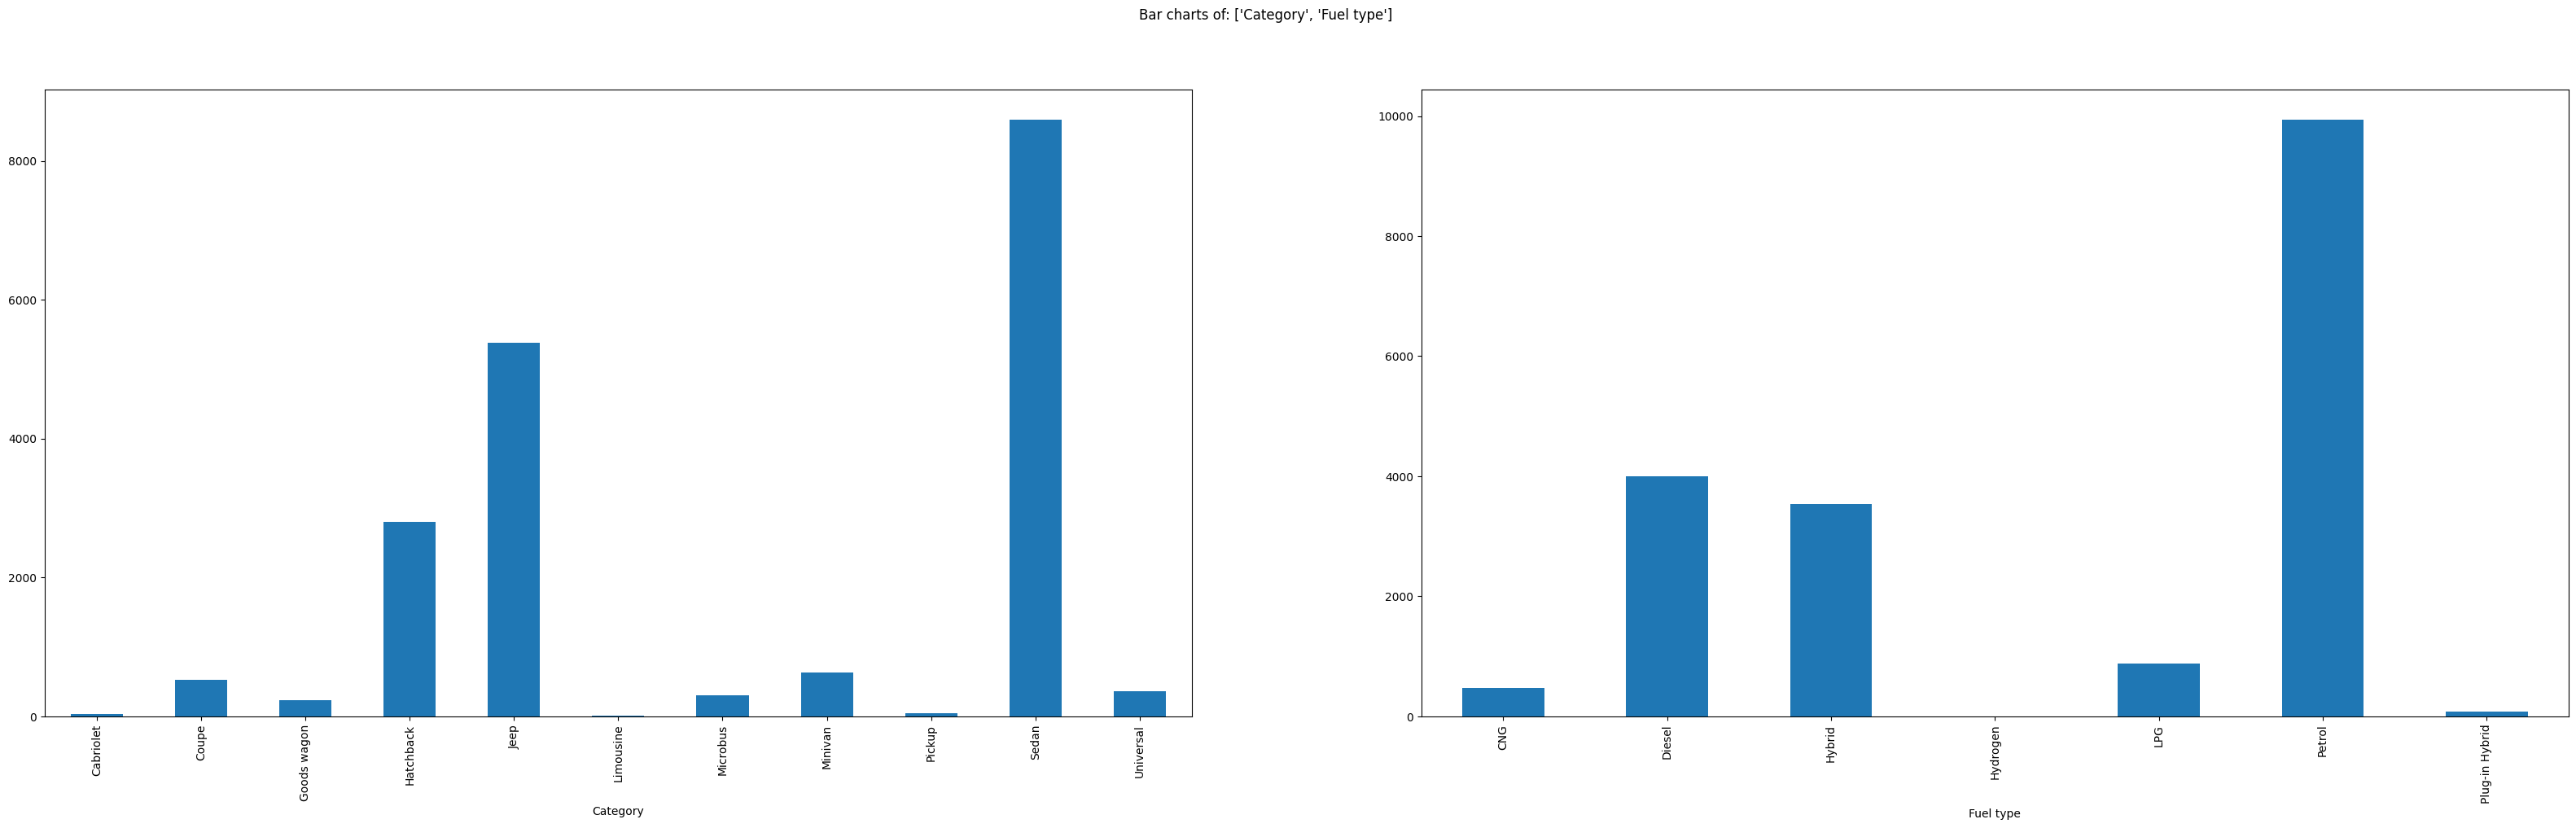

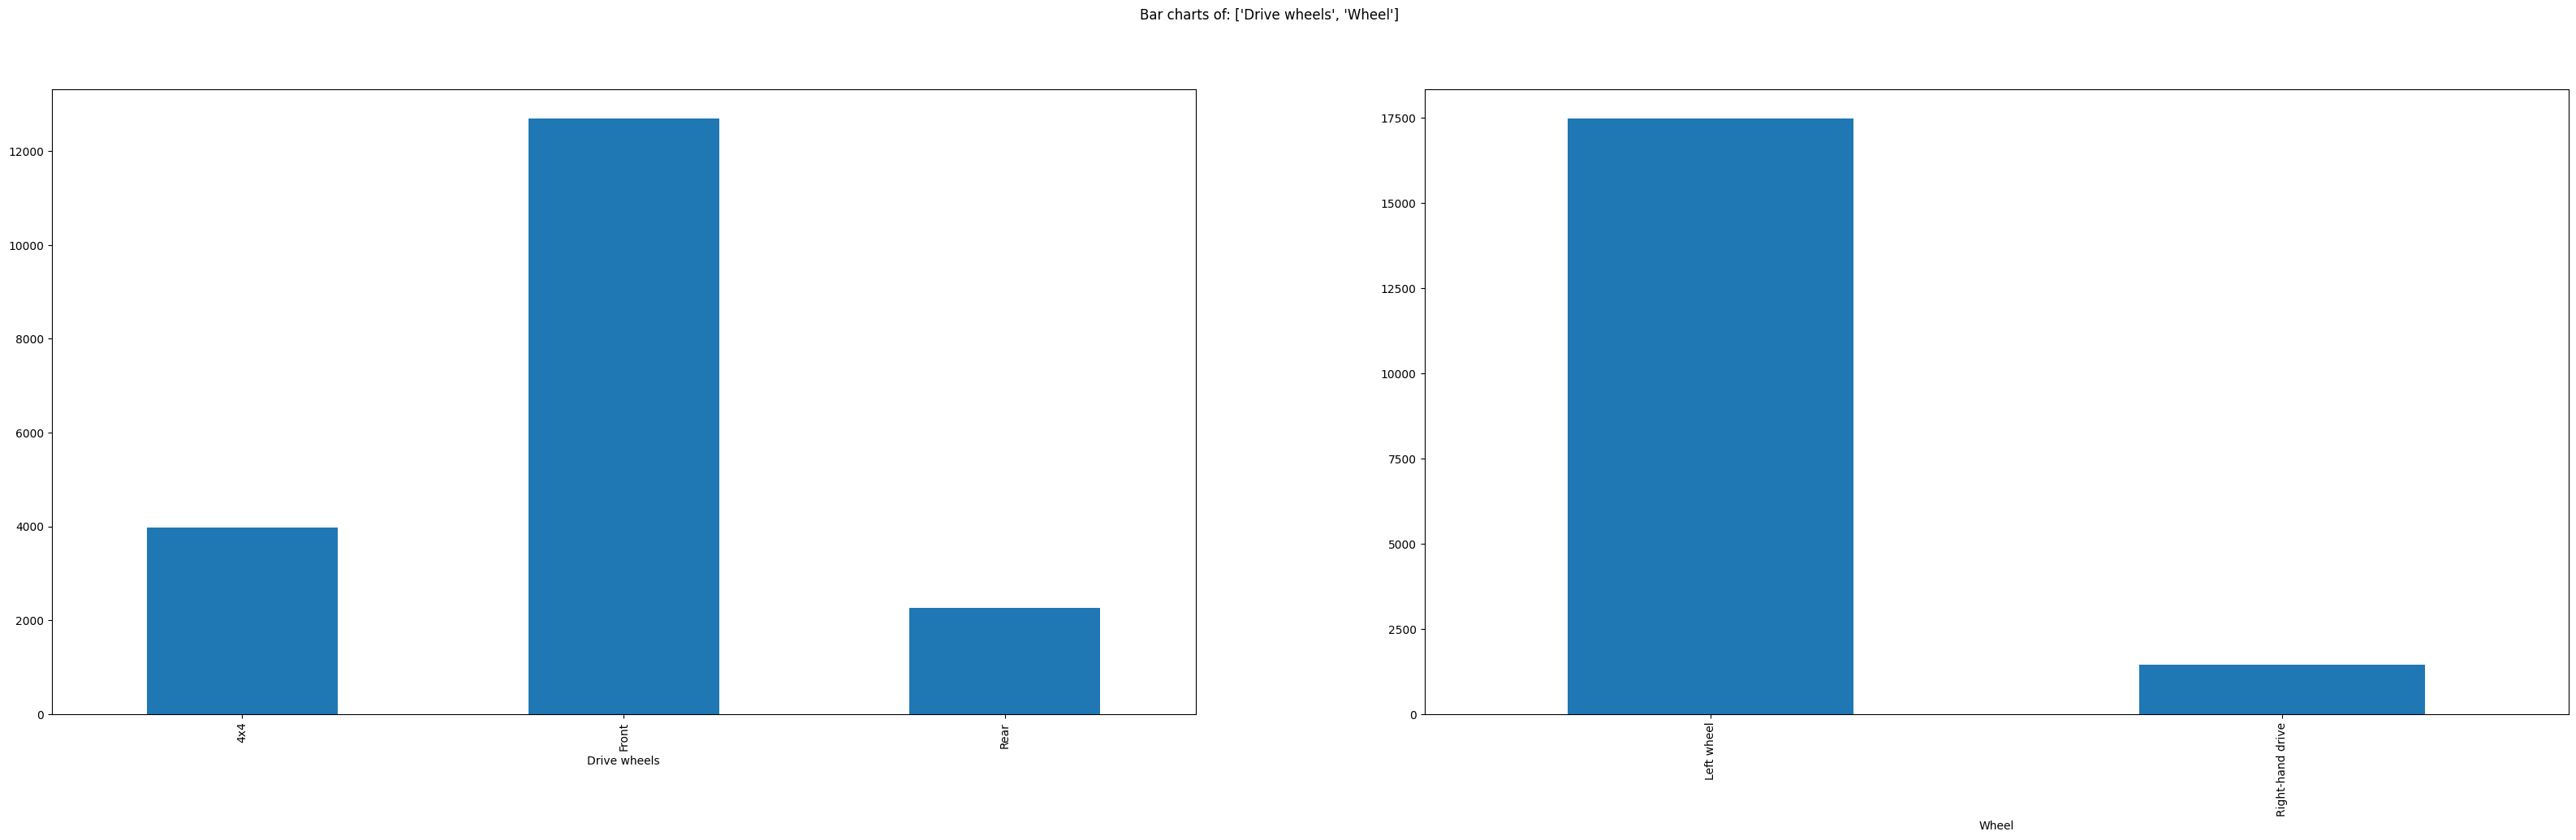

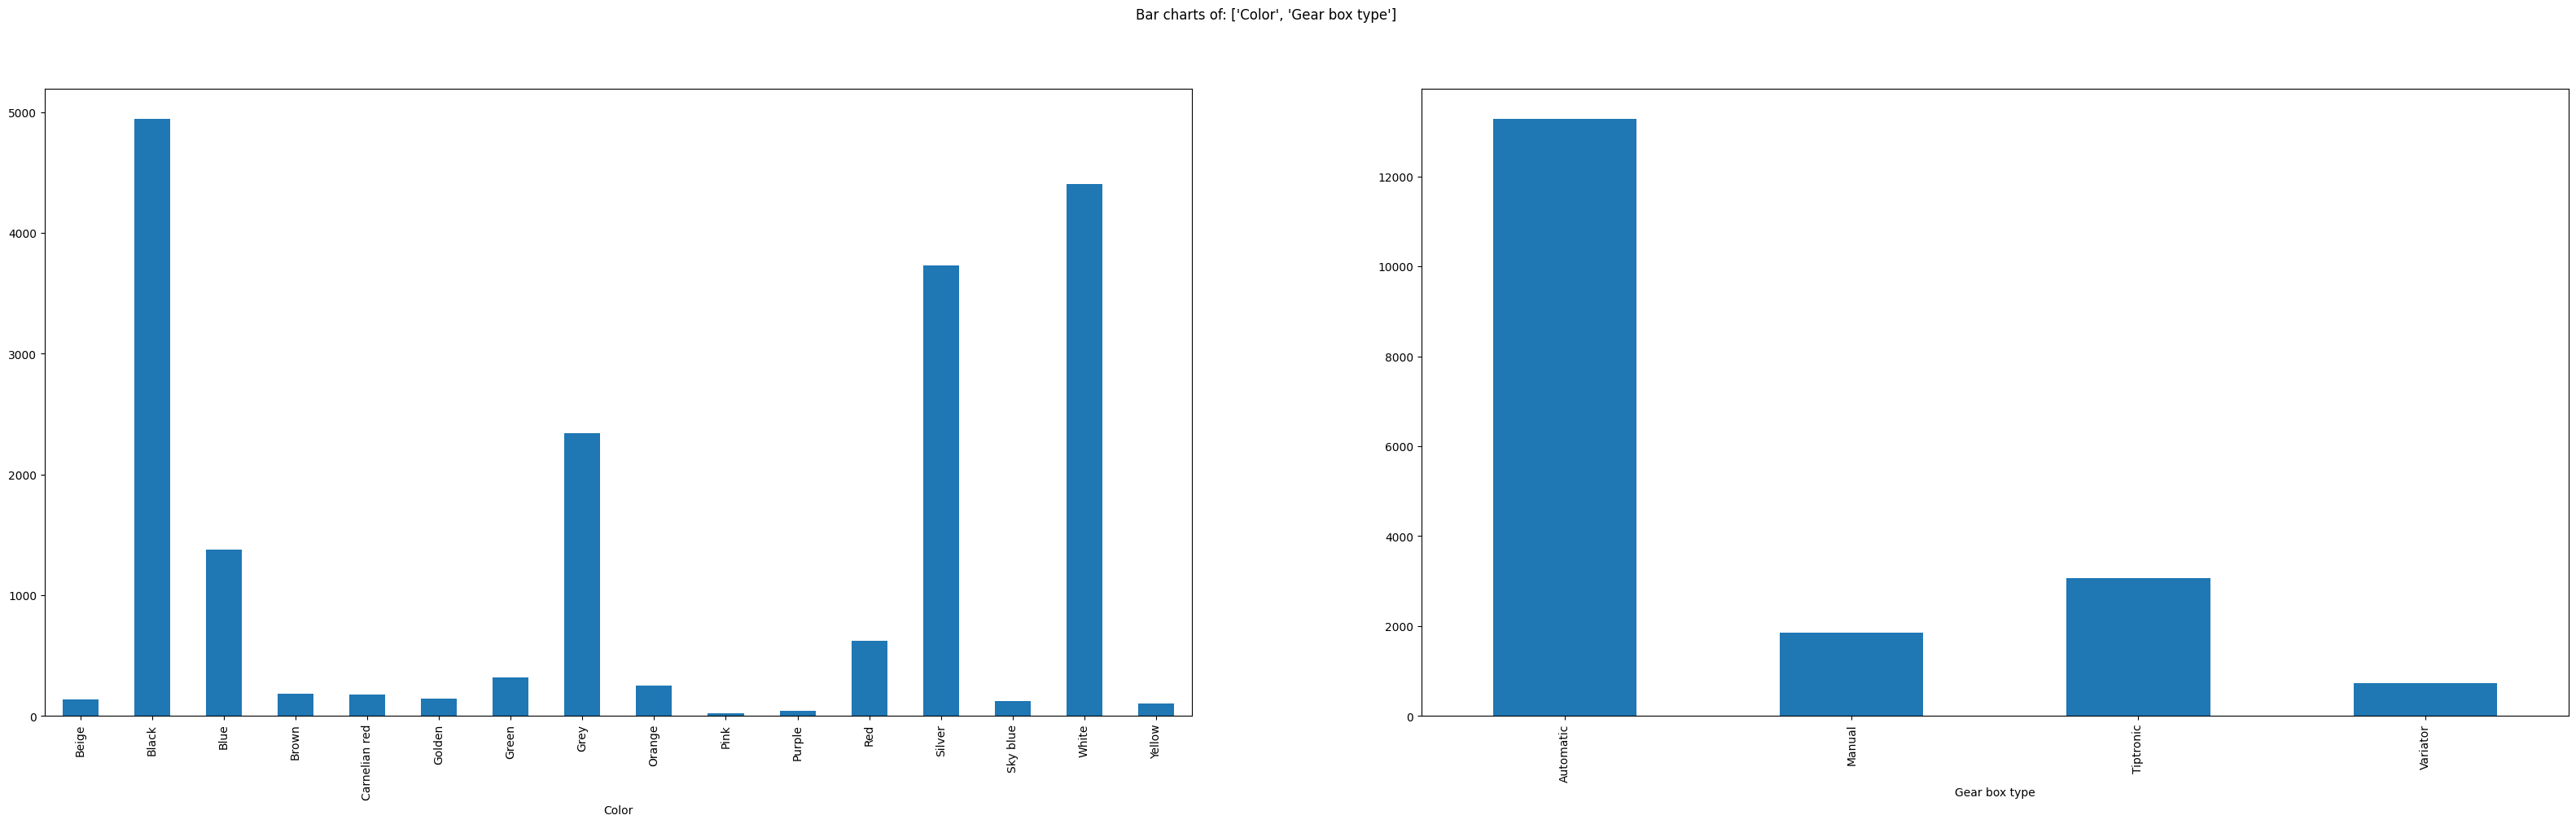

In [ ]:
###########################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=carPrediction, colsToPlot=['Category', 'Fuel type'])
PlotBarCharts(inpData=carPrediction, colsToPlot=['Drive wheels','Wheel'])
PlotBarCharts(inpData=carPrediction, colsToPlot=['Color', 'Gear box type'])



## Observations from Step 8 - Visual Exploratory Data Analysis

* Bar Charts have allowed interpretation on the seven data columns
* The bar charts represent the frequencies of each category in the Y-Axis and the category names in the X-axis.
* In the ideal bar chart, each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML/AI regression algorithm to learn.
* If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers.
* These kind of columns may not be very helpful in machine learning model development.
* We can confirm this with the correlation analysis step comng up and take a final call to select or reject the column/data attribute.
* In this dataset, it is worth noting that 'Doors', 'Wheel', 'Gear box type' and 'Drive Wheels' is skewed. There is one bar that dominates that graph in comparison to the other columns.
* Such columns may not be correlated with the target variable because there is no information to learn.
* The algorithms cannot find any rule like the value equals this so the target varibale equals that.
* When in doubt, investigate the column further.
* Selected Categorical Variables ('Category','Fuel type','Gear box type','Drive wheels','Wheel','Color'). All 6 need further analysis.

## Step 9: Now Visualise distribution of al the Continuous Predictor variables in the data using histograms

* Based on the Basic Exploratory Data Analysis, there are ten continuous predictor variables but nine if we exclude Price itself which are 'ID', 'Manufacturer', 'Model', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders' and 'Airbags'.

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Levy'}>,
        <Axes: title={'center': 'Manufacturer_encoding'}>],
       [<Axes: title={'center': 'Model_encoding'}>,
        <Axes: title={'center': 'Prod. year'}>,
        <Axes: title={'center': 'Engine volume'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Airbags'}>]], dtype=object)

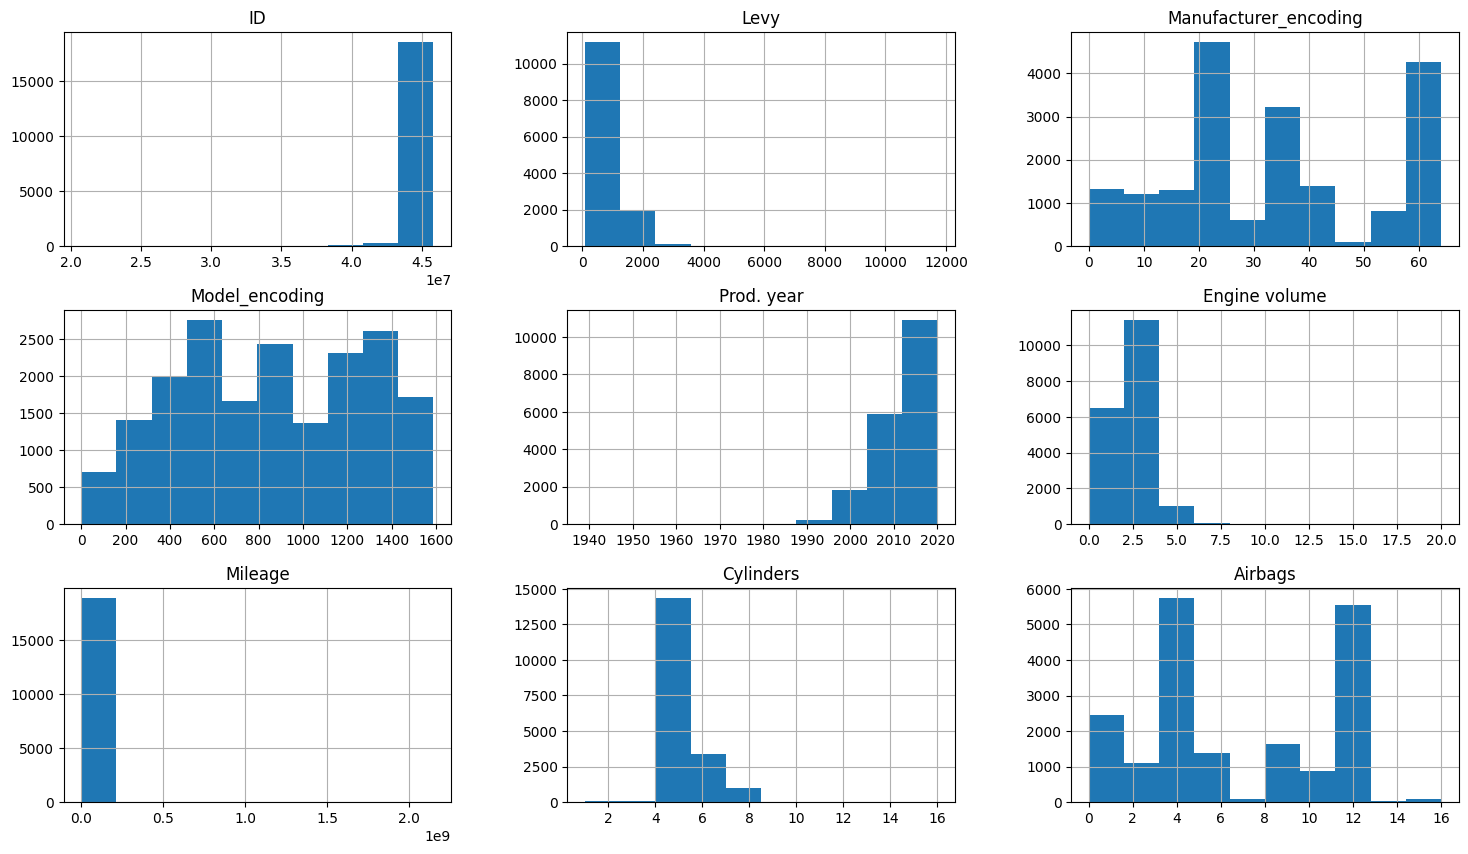

In [ ]:
# Plotting histograms of multiple columns together
carPrediction.hist(['ID', 'Levy', 'Manufacturer_encoding','Model_encoding','Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags'], figsize=(18,10))

## Observations from Step 9

* Histogram interpretation.
* Each histogram shows us the data distribution for the continuous attributes.
* X-axis shows us the value range and Y-axis shows us the amount in that value.
* Using Prod Year as an example, we say that over 100000 of the cars were produced between 2010 - 2020.
* Ideally for histogram, a bell curve result or a slightly skewed one would appear.
* If there is too much skewness, then outlier removal should be done and if that isn't sufficient enough, remove the column/variable.
* Selected Continuous Variables:
* ID - Selected. Distribution is good.
* Manufacturer - Selected. Distribution is good.
* Model - Selected. Distribution is good.
* Levy - Selected. Distribution is good.
* Prod. year - Selected. Distribution is good.
* Engine Volume - Selected. Distribution is good.
* Mileage - Selected. Distribution is good.
* Cylinders - Selected. Distribution is good.
* Airbags - Selected. Outlier shown from 14 - 16.




## Step 10: Outlier Analysis

* Outliers are extreme values which are far away from the common values.
* They can be seen as the tails of a histogram.
* Must be treated one at a time and not together.
* This is becauses outliers vary column to column so the treatment would be different.
* Why should I analyse the outliers?
* Outliers bias the building for Machine Learning Models.
* As the algorithm tries to fit the outlier, it strays from the majority.
* Two methods to treat outliers:
* Option 1: Delete the outlier records only if there are just a few rows lost.
* Option 2: Impute the outliers with a logical business value.



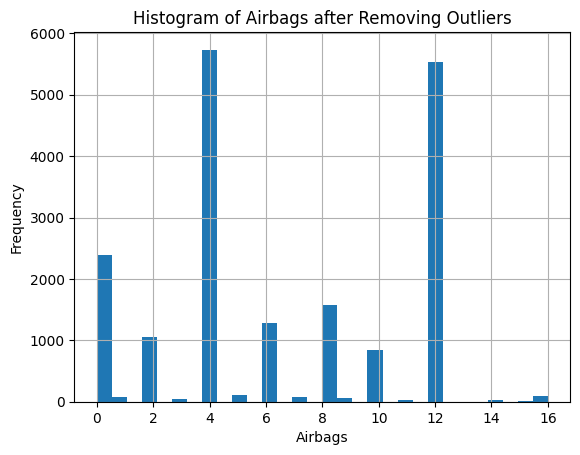

In [ ]:
# Replacing outliers for 'Airbags'
# Finding nearest value to 15 mark
c1 = carPrediction['Airbags'].quantile(0.25)
c2 = carPrediction['Airbags'].quantile(0.75)
cr7 = c2 - c1
leo = c1 - 1.5 * cr7
messi = c2 + 1.5 * cr7

# Filter outliers
filtered_data = carPrediction[(carPrediction['Airbags'] >= leo) & (carPrediction['Airbags'] <= messi)]

# Check results after filtering
plt.figure()
filtered_data['Airbags'].hist(bins=30)
plt.title('Histogram of Airbags after Removing Outliers')
plt.xlabel('Airbags')
plt.ylabel('Frequency')
plt.show()

## Step 11: Visualising Data Distribution after outlier removal

array([[<Axes: title={'center': 'Airbags'}>]], dtype=object)

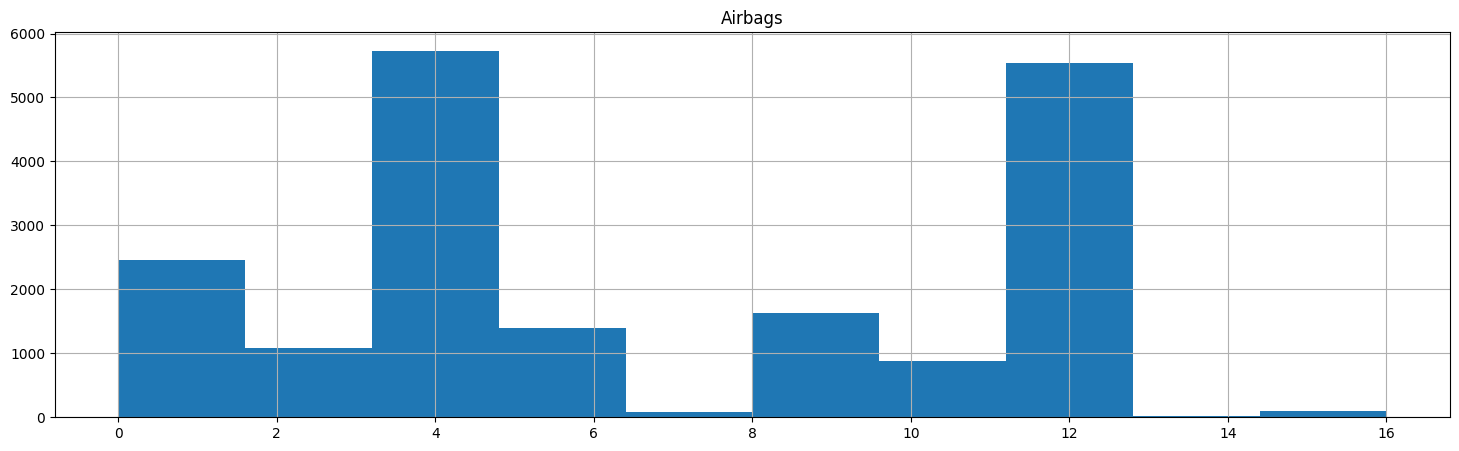

In [ ]:
carPrediction.hist(['Airbags'], figsize = (18, 5))

## Observations from Step 11

* The distribution has improved slightly
* There is a tail still but it is thick which means there are plenty of values within it meaning it is acceptable.

## Step 12: Missing Values Analysis

* Missing values are treated for each column separately.
* If a column has more than 30% of data missing, then treatment can't be done.
* That column must be rejected due to having too much missing information.
* Some options for Missing Value Treatment are:
* Delete the rows if there are only a few records
* Impute the missing values with MEDIAN value for continuous values
* Impute the mssing values with MODE value for categorical values
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [ ]:
# Finding how many missing values there are per column
carPrediction.isnull().sum()

ID                           0
Price                        0
Levy                      5709
Manufacturer                 0
Model                        0
Prod. year                   0
Category                     0
Leather interior             0
Fuel type                    0
Engine volume                0
Mileage                      0
Cylinders                    0
Gear box type                0
Drive wheels                 0
Doors                        0
Wheel                        0
Color                        0
Airbags                      0
Manufacturer_encoding        0
Model_encoding               0
Fuel type_encoding           0
Gear box type_encoding       0
Drive wheels_encoding        0
Color_encoding               0
Category_encoding            0
Wheel_encoding               0
Doors_encoding               0
True_Price                   0
dtype: int64

## Observations from Step 12: Missing Value Analysis

* There are missing values in Levy and as a percentage, it is 29.7% which if rounded is 30%.
* Therefore, we shall be excluding the Levy column from this point onwards.

## Step 13: Feature Selection (Attribute Selection)

* Now we choose the best columns(Features) which are correlated to the Target variable.
* This can be done directly by measuring the correlation values or ANOVA analysis or Chi-Square tests.
* However, it is always helpful to visualize the relation between the Target variable/class variable and each of the predictors(features) to get a better sense of data.

* Listed below are some of the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

* **Visual exploration of relationship between variables**
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots
* Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

* **For this dataset, the Target variable is Continuous, hence following two scenarios will need attention**

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

## Relationship Exploration: Continuous vs Continuous - Scatter Charts

* When the both the Target Variable and the Predictor are Continuous, we can measure the relation between the two using a scatter plot and measure the strength of relation using a metric called "Pearson's Correlation Value".

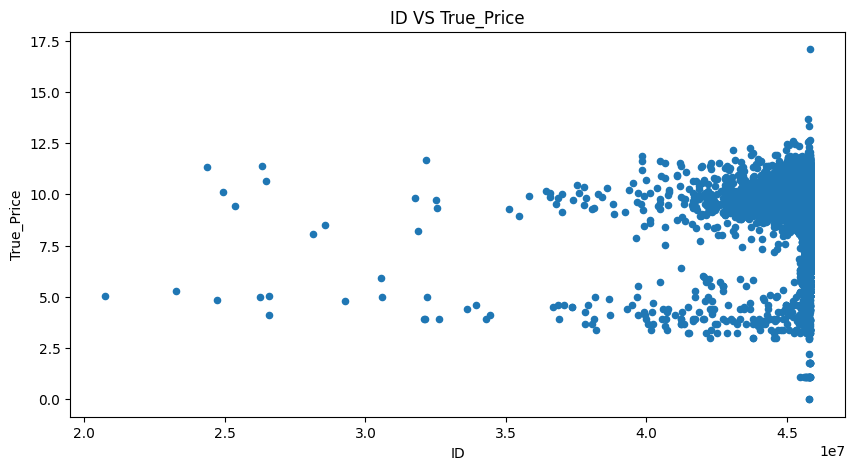

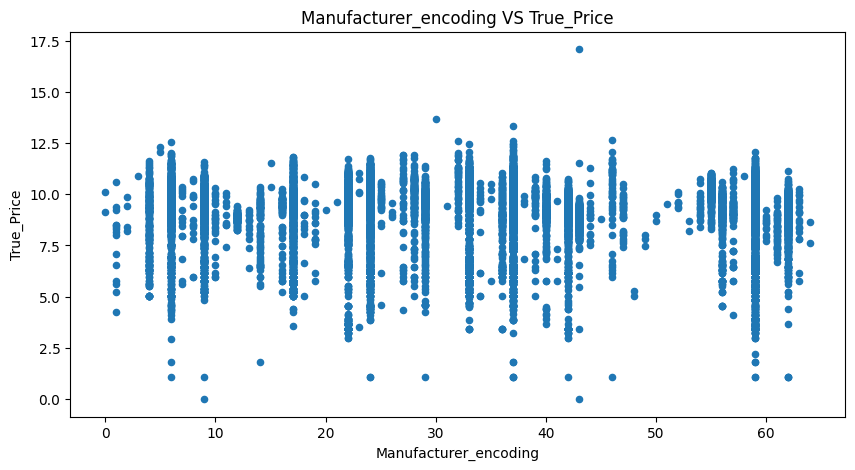

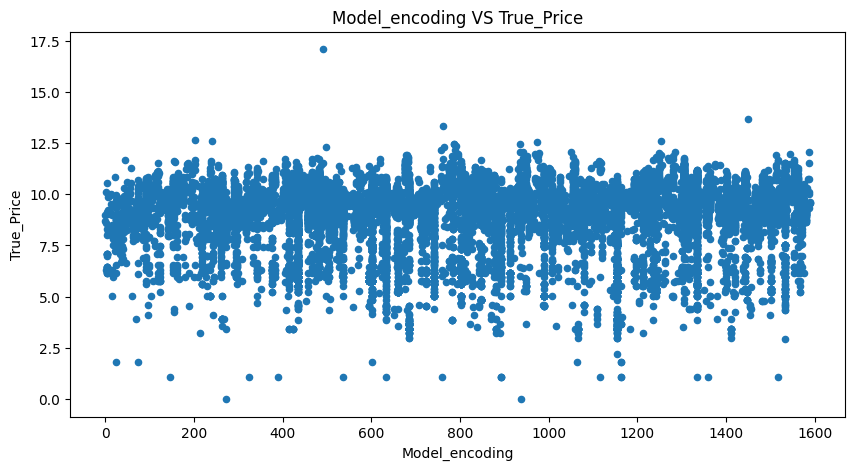

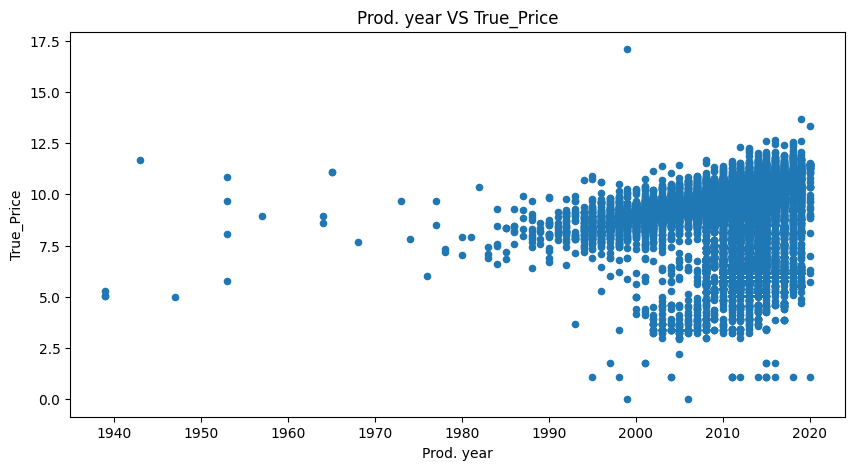

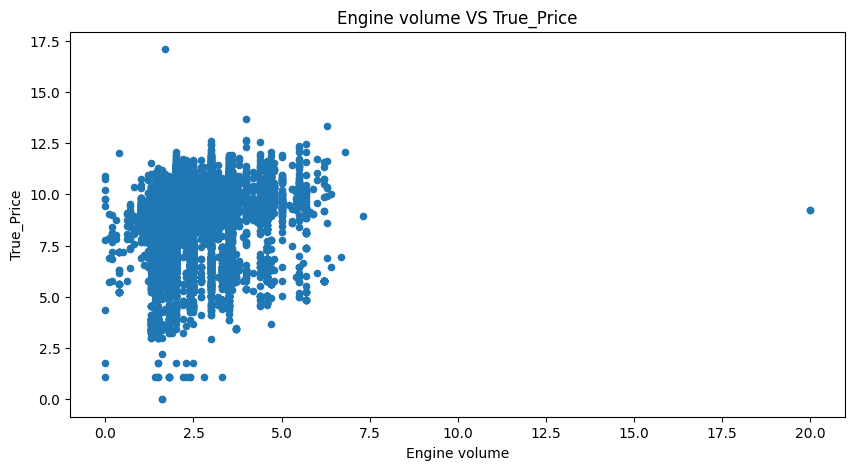

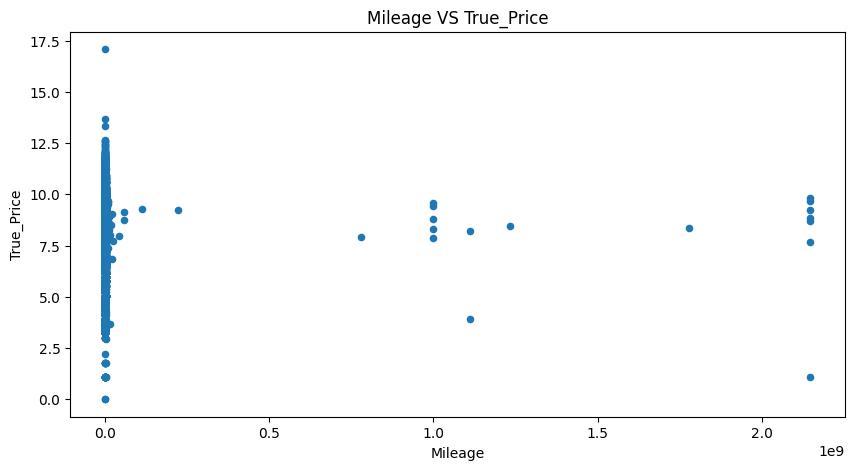

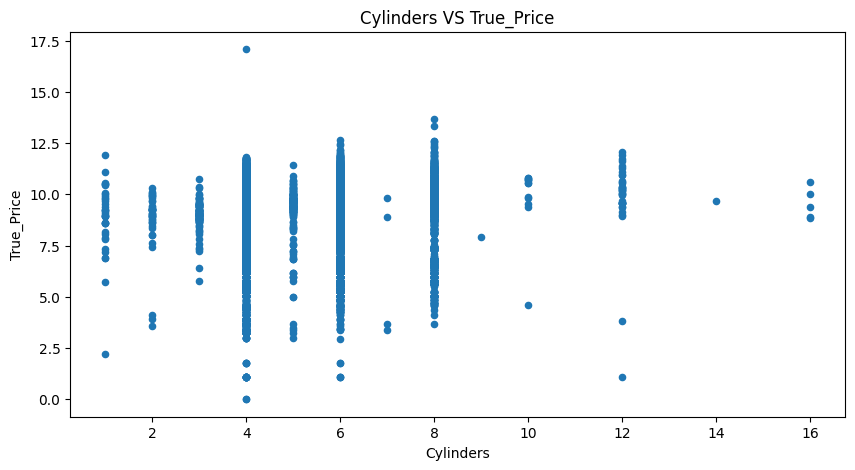

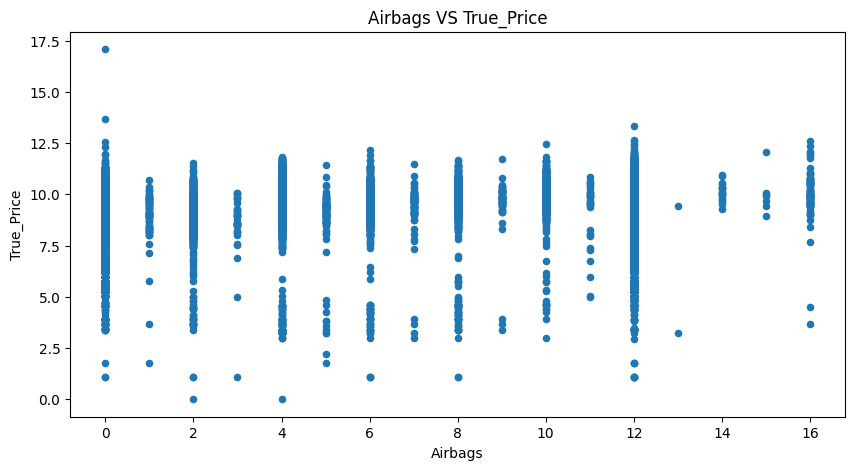

In [ ]:
ContinuousCols=['ID', 'Manufacturer_encoding','Model_encoding','Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
  carPrediction.plot.scatter(x=predictor, y='True_Price', figsize=(10,5), title=predictor+" VS " + 'True_Price')

## Scatterplot Interpretations

* What should you look for in these scatter charts?
* **Trend.** You should try to see if there is a visible trend or not. There could be three scenarios
* **Increasing Trend**: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML model building!
* **Decreasing Trend:** This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML model building!
* **No Trend**: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence that predictor/feature may not be the best one for ML model building.
* Based on this chart we can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value in the next step.

## Step 14: Continuous vs Continuous

* Pearson's correlation coefficient is a powerful metric for doing this.
* It can simply be calculated as the covariance between two features  x and  y
  (numerator) divided by the product of their standard deviations (denominator):

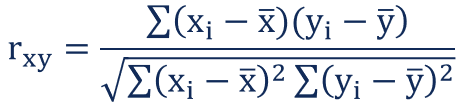

* This value can be calculated only between two numeric columns
Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.

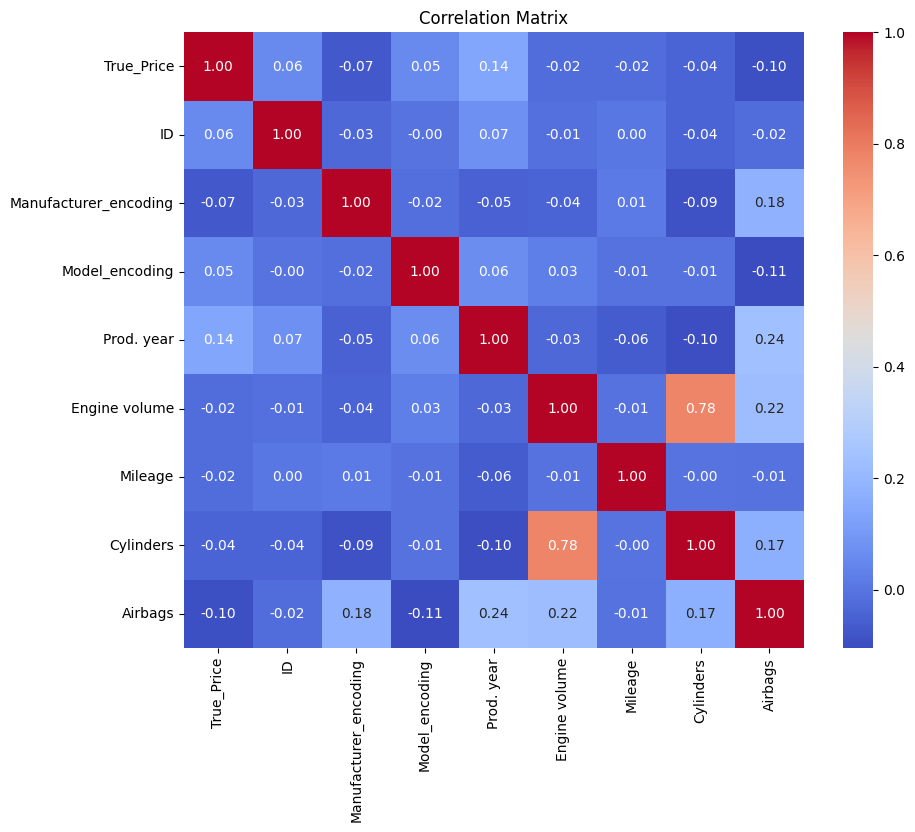

,True_Price,ID,Manufacturer_encoding,Model_encoding,Prod. year,Engine volume,Mileage,Cylinders,Airbags
True_Price,1.000000,0.058490,-0.073399,0.054759,0.139161,-0.021370,-0.019558,-0.042899,-0.096143
ID,0.058490,1.000000,-0.033129,-0.003355,0.072030,-0.013155,0.004225,-0.040617,-0.022070
Manufacturer_encoding,-0.073399,-0.033129,1.000000,-0.017169,-0.051230,-0.041466,0.012564,-0.089921,0.181005
Model_encoding,0.054759,-0.003355,-0.017169,1.000000,0.064736,0.027045,-0.008184,-0.007303,-0.105103
Prod. year,0.139161,0.072030,-0.051230,0.064736,1.000000,-0.032427,-0.064058,-0.099443,0.235160
Engine volume,-0.021370,-0.013155,-0.041466,0.027045,-0.032427,1.000000,-0.006292,0.777228,0.221991
Mileage,-0.019558,0.004225,0.012564,-0.008184,-0.064058,-0.006292,1.000000,-0.001720,-0.009174
Cylinders,-0.042899,-0.040617,-0.089921,-0.007303,-0.099443,0.777228,-0.001720,1.000000,0.174112
Airbags,-0.096143,-0.022070,0.181005,-0.105103,0.235160,0.221991,-0.009174,0.174112,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Calculating correlation matrix
ContinuousCols=['True_Price', 'ID', 'Manufacturer_encoding','Model_encoding','Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags' ]
# Now we creating the correlation matrix
correlationData = carPrediction[ContinuousCols].corr()
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlationData, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

correlationData

In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# Reduce the 0.5 threshold if no varible is selected
correlationData['True_Price'][abs(correlationData['True_Price']) > 0.1]

True_Price    1.000000
Prod. year    0.139161
Name: True_Price, dtype: float64

## Observations from Step 14

* Only one column appears when the threshold is bought down to 1:
* Prod. year

## Step 15: Relationship exploration: Categorical Vs Continuous - Box Plots

* When the target variable is Continuous and the predictor variable is Categorical we analyse the relation using Boxplots
* Measure the strength of relation using Anova test

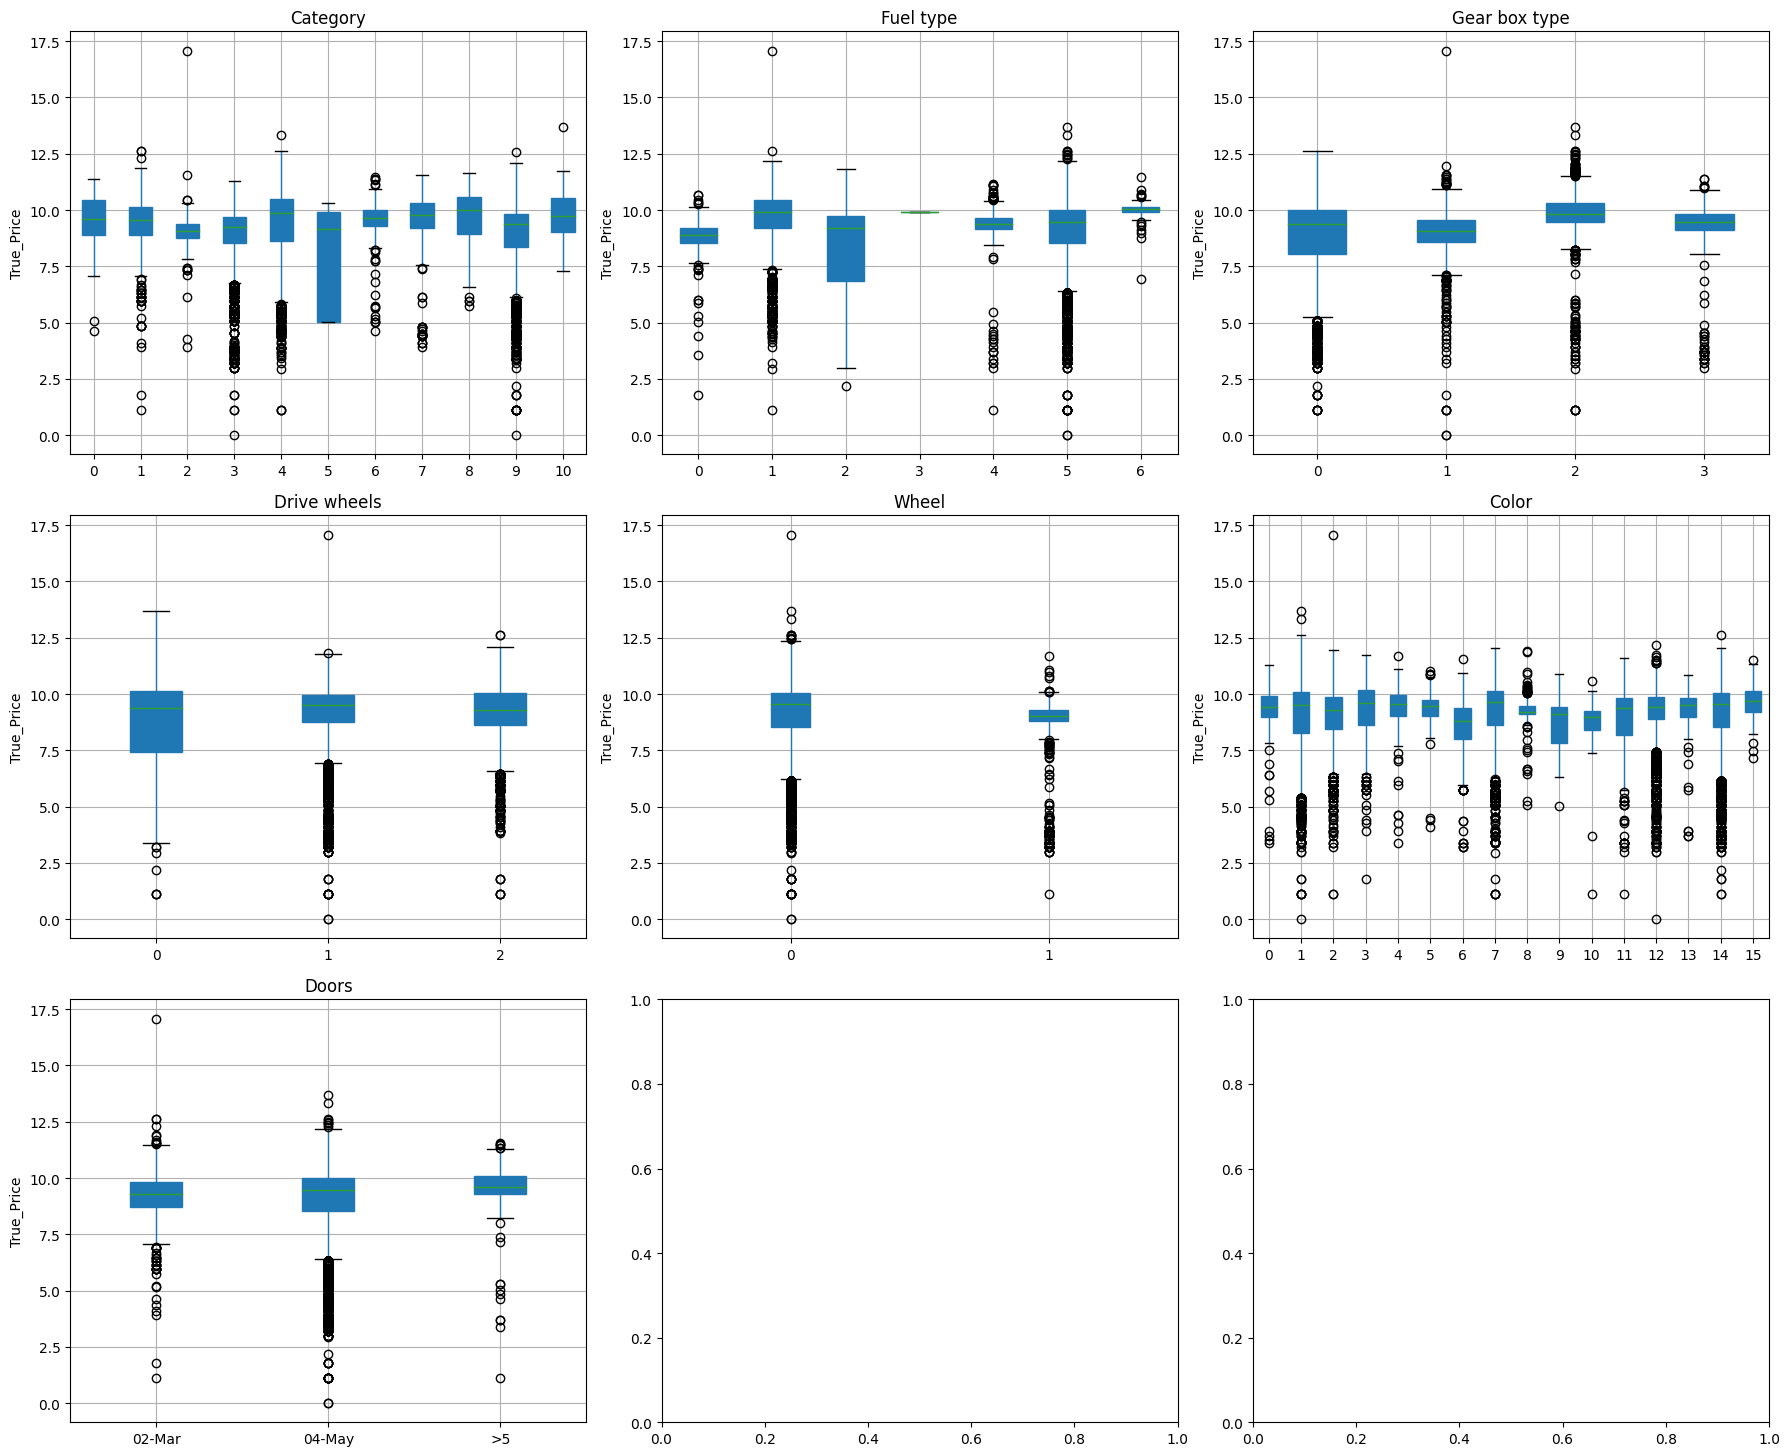

In [ ]:
# Box plots for continuous target variable True_Price and Categorical Predictors
CategoricalColsList=['Category','Fuel type','Gear box type','Drive wheels','Wheel','Color','Doors']

# Determine the number of rows needed for the subplots
nrows = len(CategoricalColsList) // 3 + (len(CategoricalColsList) % 3 > 0)
fig, Canvas = plt.subplots(nrows=nrows, ncols=3, figsize=(18, 5 * nrows))  # Adjusted for multiple rows if needed

# Flatten the axes array if more than one row
if nrows > 1:
    Canvas = Canvas.ravel()
else:
    Canvas = [Canvas]

# Creating box plots for each categorical predictor against the Target Variable "Log_Price"
for i, PredictorCol in enumerate(CategoricalColsList):
    carPrediction.boxplot(column='True_Price', by=PredictorCol, vert=True, ax=Canvas[i], patch_artist=True)
    Canvas[i].set_title(PredictorCol)
    Canvas[i].set_xlabel('')
    Canvas[i].set_ylabel('True_Price')

# Adjust layout, clear the titles (set by boxplot by default), and show plot
plt.tight_layout()
plt.suptitle('')
plt.show()

## Observations from Step 15: Box-plots interpretation

* What should you look for in these box plots?
* This plot gives an idea about the data distribution of continuous predictor in Y-axis for each of the category in the X-axis.
* If the distribution looks similar for each category(Boxes are in the same line), that means that the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to one another.
* If the distribution is different for each category(Boxes are not in the same line), it implies the variables may be correlated with True_Price.
* For this dataset, it looks like Category and Color may be correlated to the Target Variable.

We can confirm this by looking at the results of the ANOVA test below.

## Step 16: Statistical Feature Selection (Categorical vs Continuous) using ANOVA test

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption (H0) Null Hypothesis: There is NO relation between the given variables
* i.e. The average(mean) values of the numeric Target Variable is same for all the groups in the Categorical Predictor Variable.
* ANOVA Test result: Probability of H0 being true.

In [ ]:
# Defining a function to find the statistical relationship will all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA RESULTS ###### \n')
    for predictor in CategoricalPredictorList:
      CategoryGroupLists=inpData.groupby(predictor) [TargetVariable].apply(list)
      AnovaResults = f_oneway(*CategoryGroupLists)

      # If the ANOVA P-Value is <0.05, that means we reject H0
      if (AnovaResults[1] < 0.05):
        print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
        SelectedPredictors.append(predictor)
      else:
        print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
# Calling the function to check which categorical variables are correlated with the target
CategoricalPredictorList=['Category','Fuel type','Gear box type','Drive wheels','Wheel','Color','Doors']
FunctionAnova(inpData=carPrediction,
              TargetVariable='True_Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA RESULTS ###### 

Category is correlated with True_Price | P-Value: 2.0340998516352776e-111
Fuel type is correlated with True_Price | P-Value: 6.514134278477985e-258
Gear box type is correlated with True_Price | P-Value: 3.0712816086049926e-210
Drive wheels is correlated with True_Price | P-Value: 1.809101861395844e-22
Wheel is correlated with True_Price | P-Value: 2.975157110189798e-31
Color is correlated with True_Price | P-Value: 6.8434884246784e-12
Doors is correlated with True_Price | P-Value: 0.001272969419145822


['Category',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color',
 'Doors']

## Observations from Step 16

* The results of ANOVA confirm our visual analysis using box plots above.
* All categorical variables are correlated with the Target Variable.
* Final selected Categorical Columns are:
'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Doors'

## Selecting final Predictors/Features for building Machine Learning/AI Model.

* Based on extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:
* **Prod. year, Category, Fuel type, Gear box type, Drive wheels, Wheel, Color, Doors**

In [ ]:
SelectedColumns=['Prod. year', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'True_Price']
columns_to_encode = ['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in columns_to_encode:
  carPrediction[i]=le.fit_transform(carPrediction[i])

# Selecting final columns
DataForML=carPrediction[SelectedColumns]
DataForML.head()

,Prod. year,Category,Fuel type,Gear box type,Drive wheels,Wheel,Color,True_Price
0,2010,4,2,0,0,0,12,9.497622
1,2011,4,5,2,0,0,1,9.718422
2,2006,3,5,3,1,1,1,9.043932
3,2011,4,2,0,0,0,14,8.190632
4,2014,3,5,0,1,0,12,9.369564


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

pd.read_pickle('DataForML.pkl')

,Prod. year,Category,Fuel type,Gear box type,Drive wheels,Wheel,Color,True_Price
0,2010,4,2,0,0,0,12,9.497622
1,2011,4,5,2,0,0,1,9.718422
2,2006,3,5,3,1,1,1,9.043932
3,2011,4,2,0,0,0,14,8.190632
4,2014,3,5,0,1,0,12,9.369564
...,...,...,...,...,...,...,...,...
19232,1999,1,0,1,2,0,12,9.043932
19233,2011,9,5,2,1,0,11,9.660205
19234,2010,4,1,0,1,0,7,10.169997
19235,2007,4,1,0,1,0,1,8.581294


## Step 17: Data Pre-processing for Machine Learning Model Building or Model Development

* List of steps that needs to be performed on predictor variables before data can be used for machine learning
* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other normal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardisation/Normalisation/log/sqrt. Important if you are using distance based algorithms like KNN or Neural Networks.
* Converting the ordinal variable to numeric - in this data there is no Ordinal categorical variable
* Converting the binary nominal to numeric using 1/0 mapping - Leather interior is binary but for simplicity, we will be removing this column

## Converting the nominal variable to numeric using get_dummies()

In [ ]:
# Treating ALL the nominal variables at once using dummy variables
DataForML_Num=pd.get_dummies(DataForML, drop_first=True)
#DataForML.head()


# Printing sample rows
DataForML_Num.head()

,Prod. year,Category,Fuel type,Gear box type,Drive wheels,Wheel,Color,True_Price
0,2010,4,2,0,0,0,12,9.497622
1,2011,4,5,2,0,0,1,9.718422
2,2006,3,5,3,1,1,1,9.043932
3,2011,4,2,0,0,0,14,8.190632
4,2014,3,5,0,1,0,12,9.369564


## Step 18: Machine Learning Model Development:

* Splitting the data into Training and Testing sample
* We don't use the full data for creating the model (training data)
* Some data is randomly selected and kept aside for checking how good the model is
* This is known as Testing Data and the remaining data is called Training Data on which the model is built
* Typically 70% of data is used as Training Data and the rest of the 30% is used for Testing Data

In [ ]:
# Printing all column names for reference
DataForML_Num.columns

Index(['Prod. year', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels',
       'Wheel', 'Color', 'True_Price'],
      dtype='object')

In [ ]:
# Seperate Target Variable and Predictor Variables
TargetVariable='True_Price'
Predictors = ['Prod. year', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels',
       'Wheel', 'Color']

x=DataForML_Num[Predictors].values
y=DataForML_Num[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=428)

# Step 19: Standardisation/Normalisation of Data

* You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data (Optional Step)
* However, if you are using KNN or Neural Networks, then this step becomes necessary

In [ ]:
### Standardisation of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardisation or normalisation

# Choose between standardisation and MinMax normalisation
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)

# Generating the standardized values of X_train and X_test
X=PredictorScalerFit.transform(x)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13246, 7)
(13246,)
(5678, 7)
(5678,)


## Step 20: Multiple Linear Regression Algorithm For ML/AI model building

In [ ]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear Regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(x_train,y_train)
prediction=LREG.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training Data
print('R2 Value:', metrics.r2_score(y_train, LREG.predict(x_train)))

##################################################################################
print('\n##### Nidek Validation and Accuracy Calculations #####')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing Sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['True_Price']-TestingDataResults['PredictedTrue_Price']))/TestingDataResults['True_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy=100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative due to outliers
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.08863619595818917

##### Nidek Validation and Accuracy Calculations #####
   Prod. year  Category  Fuel type  Gear box type  Drive wheels  Wheel  Color  \
0        2013         9          5              0             1      0     14   
1        2013         9          5              0             1      0     12   
2        2015         9          5              0             1      0      1   
3        2001         3          5              0             1      1      0   
4        1998         6          1              1             2      0      2   

   True_Price  PredictedTrue_Price  
0    9.359105                  9.0  
1    6.152733                  9.0  
2    9.911555                  9.0  
3    8.926252                  8.0  
4    9.842516                  9.0  
Mean Accuracy on test data: 83.97634906447112
Median Accuracy on test data: 91.1865410259685

Accuracy values for 10-fold Cross Validation:
 [83.56812607 84.87349451 84.17535339 83.58831

## Decisions Tree Regression

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.23012278580968815

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Category  Fuel type  Gear box type  Drive wheels  Wheel  Color  \
0        2013         9          5              0             1      0     14   
1        2013         9          5              0             1      0     12   
2        2015         9          5              0             1      0      1   
3        2001         3          5              0             1      1      0   
4        1998         6          1              1             2      0      2   

   True_Price  PredictedTrue_Price  
0    9.359105                  9.0  
1    6.152733                  9.0  
2    9.911555                  9.0  
3    8.926252                  8.0  
4    9.842516                 10.0  
Mean Accuracy on test data: 85.40316353528738
Median Accuracy on test data: 92.60762480067473

Accuracy values for 10-fold Cross Validation

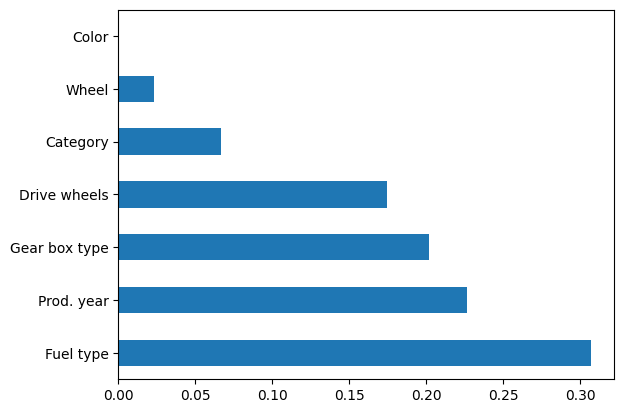

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(x_train,y_train)
prediction=DT.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['True_Price']-TestingDataResults['PredictedTrue_Price']))/TestingDataResults['True_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Plot/Visualising the Decision Tree

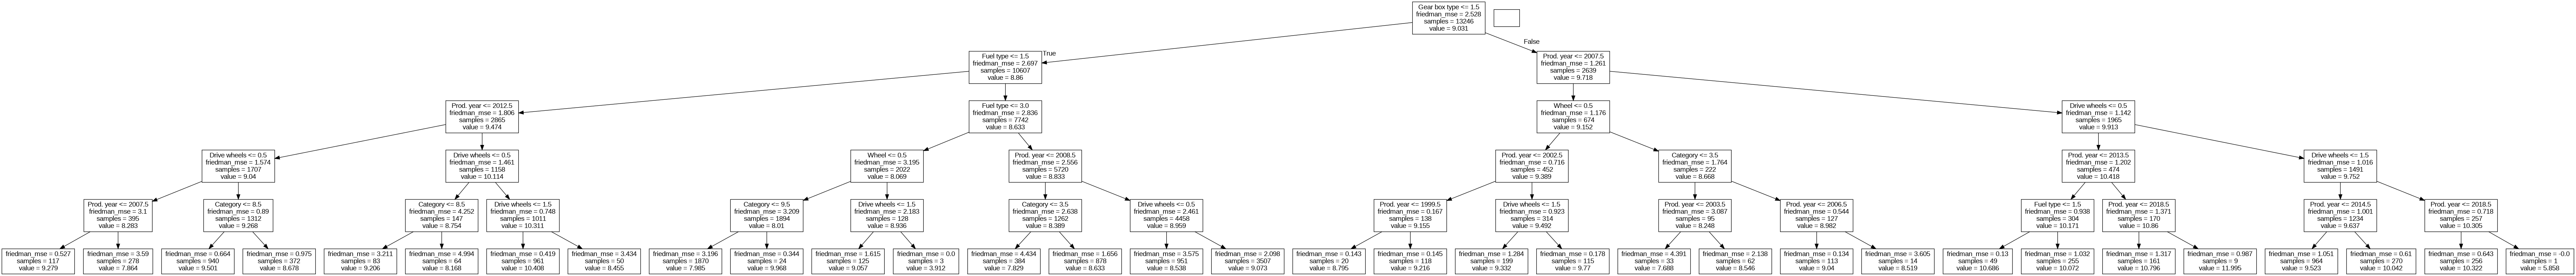

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

#printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in, image doesn't load properly unlessed zoomed in

## Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.20617962474956741

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Category  Fuel type  Gear box type  Drive wheels  Wheel  Color  \
0        2013         9          5              0             1      0     14   
1        2013         9          5              0             1      0     12   
2        2015         9          5              0             1      0      1   
3        2001         3          5              0             1      1      0   
4        1998         6          1              1             2      0      2   

   True_Price  PredictedTrue_Price  
0    9.359105                  9.0  
1    6.152733                  9.0  
2    9.911555                  9.0  
3    8.926252                  8.0  
4    9.842516                  9.0  
Mean Accuracy on test data: 84.98888036742534
Median Accuracy on test data: 91.75647310900217

Accuracy values for 10-fol

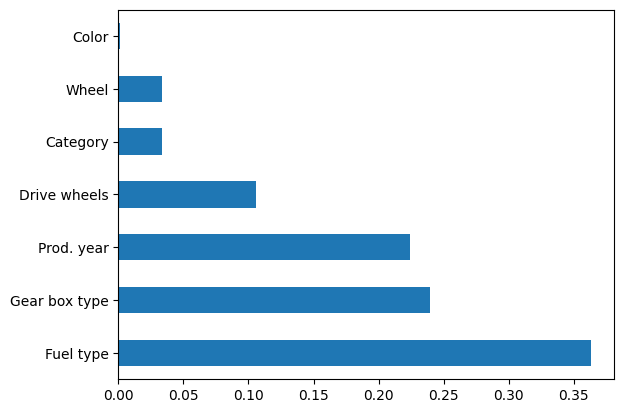

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(x_train,y_train)
prediction=RF.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['True_Price']-TestingDataResults['PredictedTrue_Price']))/TestingDataResults['True_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Plotting One of the Decision Tree in Random Forest Regression

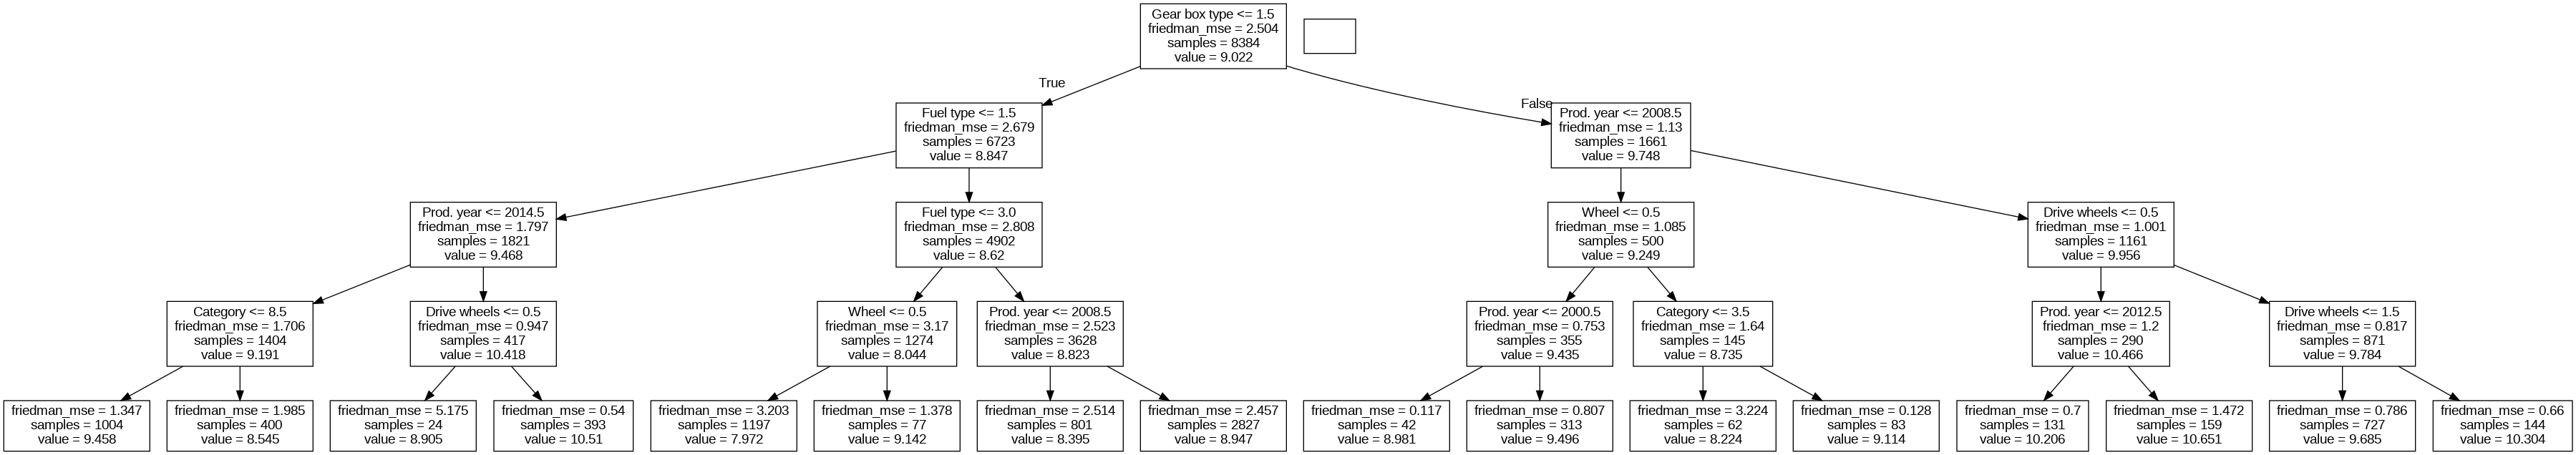

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

## Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.1314705521705909

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Category  Fuel type  Gear box type  Drive wheels  Wheel  Color  \
0        2013         9          5              0             1      0     14   
1        2013         9          5              0             1      0     12   
2        2015         9          5              0             1      0      1   
3        2001         3          5              0             1      1      0   
4        1998         6          1              1             2      0      2   

   True_Price  PredictedTrue_Price  
0    9.359105                  9.0  
1    6.152733                  9.0  
2    9.911555                  9.0  
3    8.926252                  7.0  
4    9.842516                  9.0  
Mean Accuracy on test data: 84.02741842189283
Median Accuracy on test data: 

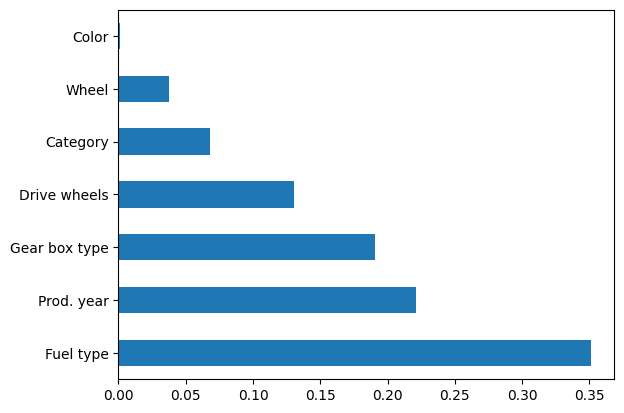

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(x_train,y_train)
prediction=AB.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(x_train)))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['True_Price']-TestingDataResults['PredictedTrue_Price']))/TestingDataResults['True_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## XGBoost Regressor


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.2730915597391398

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Category  Fuel type  Gear box type  Drive wheels  Wheel  Color  \
0        2013         9          5              0             1      0     14

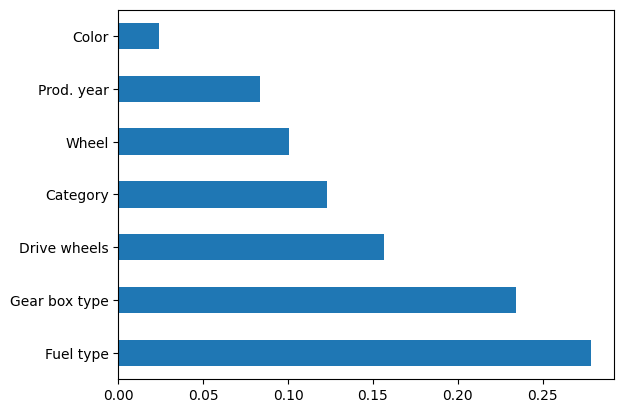

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(x_train,y_train)
prediction=XGB.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['True_Price']-TestingDataResults['PredictedTrue_Price']))/TestingDataResults['True_Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


## Plotting a single Decision tree out of XGBoost

<Axes: >

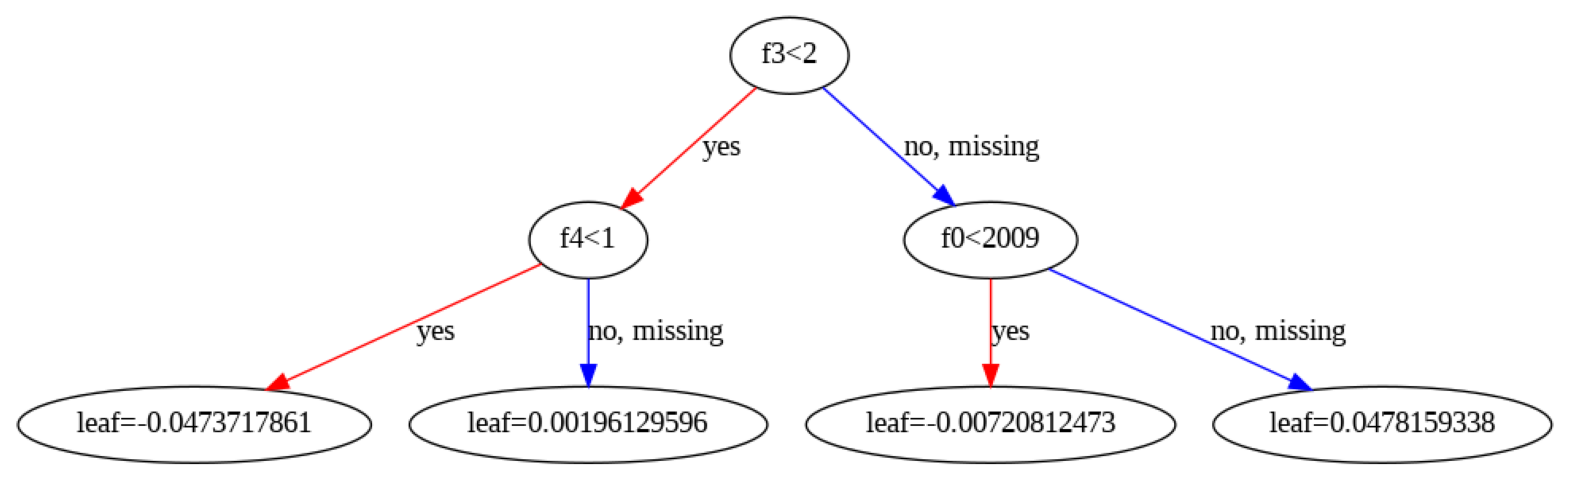

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

## K-Nearest Neighbor(KNN)

In [ ]:
#KNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(x_train,y_train)
prediction=KNN.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['True_Price']-TestingDataResults['PredictedTrue_Price']))/TestingDataResults['True_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.3524868179323848

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Category  Fuel type  Gear box type  Drive wheels  Wheel  Color  \
0        2013         9          5              0             1      0     14   
1        2013         9          5              0             1      0     12   
2        2015         9          5              0             1      0      1   
3        2001         3          5              0             1      1      0   
4        1998         6          1              1             2      0      2   

   True_Price  PredictedTrue_Price  
0    9.359105                 10.0  
1    6.152733                  9.0  
2    9.911555                  9.0  
3    8.926252                  8.0  
4    9.842516                  9.0  

Accuracy values for 10-fold Cross Validation:
 [86.65106345 87.52362806 86.64500195 86.58705862        -inf 87.30893306
 87.08808647 86.16955208        -inf 87.53126

## Support Vector Machine (SVM) Regressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(x_train,y_train)
prediction=SVM.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['True_Price']-TestingDataResults['PredictedTrue_Price']))/TestingDataResults['True_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.15557490903843552

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Category  Fuel type  Gear box type  Drive wheels  Wheel  Color  \
0        2013         9          5              0             1      0     14   
1        2013         9          5              0             1      0     12   
2        2015         9          5              0             1      0      1   
3        2001         3          5              0             1      1      0   
4        1998         6          1              1             2      0      2   

   True_Price  PredictedTrue_Price  
0    9.359105                 10.0  
1    6.152733                 10.0  
2    9.911555                  9.0  
3    8.926252                  8.0  
4    9.842516                  9.0  
Mean Accuracy on test data: 85.29875024272036
Median Accuracy on test data: 94.45108603936288

Accuracy values for 10-fold Cross Validation:
 [83.94903523 85.46170406 84.73929363

## Step 21: Model Deployment

* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.

* In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

* I am choosing XGboost as this seems to boost a high level accuracy!

* In order to deploy the model we follow steps outlined next.

* Train/Build the model again using 100% data available

* Save the model as a serialized file which can be stored anywhere.

* Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction

* Choosing only the most important variables

* Its beneficial to keep lesser number of predictors for the model while deploying it in production.

* The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features, hence, more stable.

* This is important specially when the data is high dimensional(too many predictor columns/features).

* For this dataset, the most important predictor variables are 'Prod. year', 'Gear box type', and 'Fuel type'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables will result in better house price prediction platform/system.

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='True_Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Prod. year', 'Drive wheels', 'Gear box type']

x=DataForML_Num[Predictors].values
y=DataForML_Num[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)

# Generating the standardized values of X
x=PredictorScalerFit.transform(x)

print(x.shape)
print(y.shape)

(18924, 3)
(18924,)


## Cross Validating the final model accuracy with less predictors



In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [84.68101111 85.79161308 85.10665486 84.36315965        -inf 85.34688328
 84.89272122 84.15386497        -inf 85.77875398]

Final Average Accuracy of the model: -inf


## Step 22: Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(x,y)

## Step 23: Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/My_ST1CapstoneProject


## Step 24: Create a python function

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Gear box type', 'Prod. year', 'Fuel type']

    # Generating the input values to the model
    x=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    x=PredictorScalerFit.transform(x)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(x)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [ ]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[3.0,2020.0,2.0],[2.0,2020.0,3.0]],columns=['Gear box type', 'Prod. year', 'Fuel type'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   Gear box type  Prod. year  Fuel type
0            3.0      2020.0        2.0
1            2.0      2020.0        3.0


,Prediction
0,5.560286
1,5.955386


## Conclusion
* The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
* Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the house price tasks  in the platform /system.